# t-SNE and UMAP

While PCA is a powerful linear dimensionality reduction technique, it may not capture complex non-linear relationships in the data. To address this, we can use non-linear dimensionality reduction methods like t-SNE and UMAP.

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

- Focuses on preserving local relationships (neighboring points) in high-dimensional data when mapped to lower dimensions.
- Useful for visualizing clusters in data.
- Computationally intensive for large datasets.

## UMAP (Uniform Manifold Approximation and Projection)

- Preserves both local and some global structure of data.
- Generally faster than t-SNE and scales better to large datasets.
- Based on manifold learning techniques and topological data analysis.

In this section, we'll apply PCA, t-SNE, and UMAP to the MNIST dataset and visualize the results.

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

In [11]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(int)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of samples you want in total
sample_size = 2000

# Number of unique labels/classes
num_classes = len(np.unique(y))

# Number of samples per class
samples_per_class = sample_size // num_classes

# Ensure sample_size is divisible by num_classes
sample_size = samples_per_class * num_classes

print(f"Total sample size adjusted to {sample_size} to evenly distribute among classes.")

# Initialize lists to collect indices
indices_list = []

# Set random seed for reproducibility
np.random.seed(42)

# For each class, randomly select samples_per_class indices
for class_label in np.unique(y):
    # Find indices of all samples with the current class label
    class_indices = np.where(y == class_label)[0]
    # Randomly select samples_per_class indices from the class_indices
    selected_indices = np.random.choice(class_indices, size=samples_per_class, replace=False)
    # Add the selected indices to the list
    indices_list.extend(selected_indices)

# Convert list of indices to a numpy array
indices = np.array(indices_list)

# Shuffle the indices to mix the classes
np.random.shuffle(indices)

# Get the sampled data and labels
X_sample = X_scaled[indices]
y_sample = y[indices]

print(f"Sampled data shape: {X_sample.shape}")
print(f"Sampled labels distribution: {np.bincount(y_sample)}")


Total sample size adjusted to 2000 to evenly distribute among classes.
Sampled data shape: (2000, 784)
Sampled labels distribution: [200 200 200 200 200 200 200 200 200 200]


### PCA on MNIST   &&   t-SNE on MNIST   &&   UMAP on MNIST

In [12]:
# Apply dimensionality reduction methods
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_sample)

/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/alireza/Documents/pyvenv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


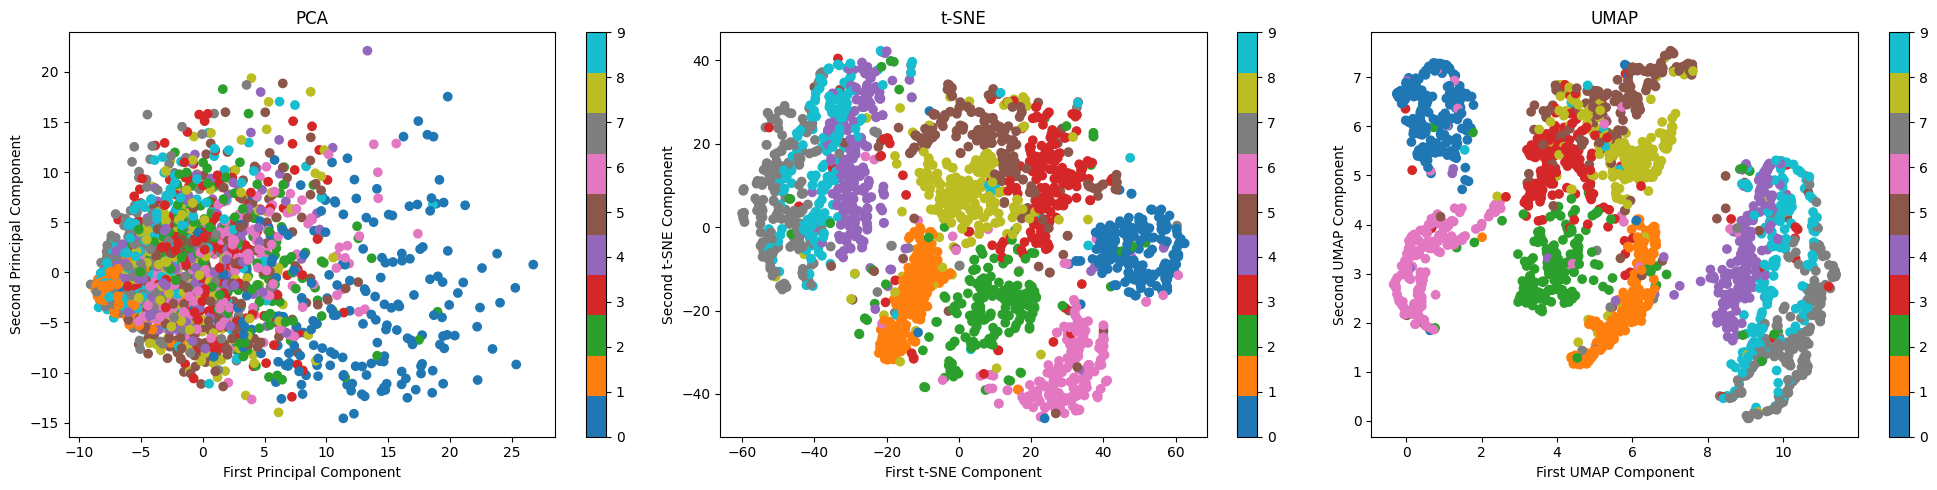

In [13]:
# Create a figure with three subplots
plt.figure(figsize=(20, 5))

# Plot PCA results
plt.subplot(131)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10')
plt.colorbar(scatter)
plt.title('PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot t-SNE results
plt.subplot(132)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10')
plt.colorbar(scatter)
plt.title('t-SNE')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')

# Plot UMAP results
plt.subplot(133)
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='tab10')
plt.colorbar(scatter)
plt.title('UMAP')
plt.xlabel('First UMAP Component')
plt.ylabel('Second UMAP Component')

plt.tight_layout()
plt.show()

### Comparison and Discussion

- **PCA**:
  - Linear method; captures the directions of maximum variance.
  - The plot may show overlapping clusters due to its linear nature.

- **t-SNE**:
  - Non-linear method focusing on preserving local structure.
  - Often shows well-separated clusters, making it useful for visualization.
  - Computationally intensive; slower on large datasets.

- **UMAP**:
  - Non-linear method that preserves both local and some global structure.
  - Generally faster than t-SNE and scales better to large datasets.
  - Can capture more complex structures in the data.

From the visualizations, we can observe how each method reduces the dimensionality of the MNIST dataset and the extent to which they separate the different digit classes.